In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from tensorflow.keras.utils import to_categorical
from scipy.stats import linregress
# import sqlalchemy
# from sqlalchemy import create_engine, func
# from sqlalchemy.ext.automap import automap_base
# from sqlalchemy.orm import Session

# NOT UPLOADED TO GITHUB
# from config import PASSWORD, USERNAME, DATABASE_NAME, ENDPOINT

2022-10-13 08:34:11.377295: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# engine = create_engine(f'postgresql+psycopg2://{USERNAME}:{PASSWORD}@{ENDPOINT}/{DATABASE_NAME}')
# Base = automap_base()
# Base.prepare(engine, reflect=True)
# Base.classes.keys()


In [3]:
# #Assigning tables to variables
# listings = Base.classes.listings
# calendar = Base.classes.calendar
# reviews = Base.classes.reviews

In [4]:
# session = Session(engine)
# listings_id = session.query(listings.id)

# sql_query_listings = pd.read_sql_query ('''
#                                SELECT
#                                *
#                                FROM listings_clean
#                                ''', engine)




In [6]:
df_list = pd.read_csv("Resources/cleandata/clean_listings.csv")
df_list.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0
1,953595,Seattle,WA,98119,47.639123,-122.365666,4,1.0,1.0,1.0,150,96.0
2,3308979,Seattle,WA,98119,47.629724,-122.369483,11,4.5,5.0,7.0,975,97.0
3,278830,Seattle,WA,98119,47.632918,-122.372471,6,2.0,3.0,3.0,450,92.0
4,5956968,Seattle,WA,98119,47.630525,-122.366174,2,1.0,1.0,1.0,120,95.0


In [5]:
# df_list = pd.DataFrame(sql_query_listings, columns = sql_query_listings.keys())
# df_list = df_list.rename(columns={'id': 'listing_id'})
# df_list.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85.0,95.0
1,953595,Seattle,WA,98119,47.639123,-122.365666,4,1.0,1.0,1.0,150.0,96.0
2,3308979,Seattle,WA,98119,47.629724,-122.369483,11,4.5,5.0,7.0,975.0,97.0
3,278830,Seattle,WA,98119,47.632918,-122.372471,6,2.0,3.0,3.0,450.0,92.0
4,5956968,Seattle,WA,98119,47.630525,-122.366174,2,1.0,1.0,1.0,120.0,95.0


In [6]:
# sql_query_calendar = pd.read_sql_query ('''
#                                SELECT
#                                *
#                                FROM calendar_clean
#                                ''', engine)

# df_cal = pd.DataFrame(sql_query_calendar, columns = sql_query_calendar.keys())
# df_cal.head()

,listing_id,date,available,price
0,241032,1,t,85.0
1,241032,1,t,85.0
2,241032,1,t,85.0
3,241032,1,t,85.0
4,241032,1,t,85.0


In [7]:
df_cal = pd.read_csv("Resources/cleandata/clean_calendar.csv")
df_cal.head()

,listing_id,date,available,price
0,241032,1,t,85
1,241032,1,t,85
2,241032,1,t,85
3,241032,1,t,85
4,241032,1,t,85


In [8]:
df_cal_g = df_cal.groupby(['listing_id','date']).mean()
df_cal_g

price
listing_id date       
3335       1     120.0
           2     120.0
           3     120.0
           4     120.0
           5     120.0
...                ...
10340165   8      43.0
           9      43.0
           10     43.0
           11     43.0
           12     43.0

[33939 rows x 1 columns]

In [9]:
df_cal_g = df_cal_g.reset_index(level=['date'])
df_cal_g.head()

,date,price
listing_id,,
3335,1,120.0
3335,2,120.0
3335,3,120.0
3335,4,120.0
3335,5,120.0


In [10]:
df = df_list.merge(df_cal_g, how='inner', on='listing_id')
df.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price_x,review_scores_rating,date,price_y
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,1,85.0
1,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,2,85.0
2,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,3,85.0
3,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,4,85.0
4,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,5,85.0


In [11]:
df.rename(columns={"price_y":'price','date':'month'}, inplace=True)
df.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price_x,review_scores_rating,month,price
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,1,85.0
1,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,2,85.0
2,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,3,85.0
3,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,4,85.0
4,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,5,85.0


In [12]:
df.drop(columns=['state','listing_id','price_x'], inplace=True)

In [13]:
df.head()

,city,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,review_scores_rating,month,price
0,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,1,85.0
1,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,2,85.0
2,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,3,85.0
3,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,4,85.0
4,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,5,85.0


In [14]:
df.price.min()

20.0

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 2.6000e+01, 0.0000e+00,
        8.0000e+00, 8.0000e+00, 1.2300e+02, 1.8200e+02, 2.3200e+02,
        1.1420e+03, 1.7220e+03, 6.9350e+03, 1.8073e+04]),
 array([ 20.        ,  25.71428571,  31.42857143,  37.14285714,
         42.85714286,  48.57142857,  54.28571429,  60.        ,
         65.71428571,  71.42857143,  77.14285714,  82.85714286,
         88.57142857,  94.28571429, 100.        ]),
 <BarContainer object of 14 artists>)

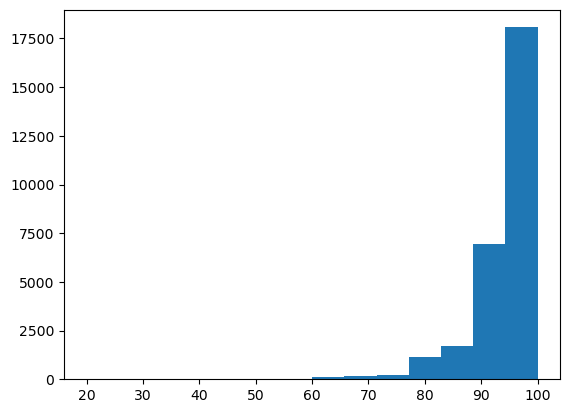

In [15]:
plt.hist(df['review_scores_rating'], bins=14)

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.6000e+01, 0.0000e+00, 1.2000e+01, 1.0300e+02,
        1.8300e+02, 3.1400e+02, 3.2470e+03, 2.4566e+04]),
 array([1.30103   , 1.35095642, 1.40088285, 1.45080928, 1.50073571,
        1.55066214, 1.60058857, 1.650515  , 1.70044143, 1.75036786,
        1.80029428, 1.85022071, 1.90014714, 1.95007357, 2.        ]),
 <BarContainer object of 14 artists>)

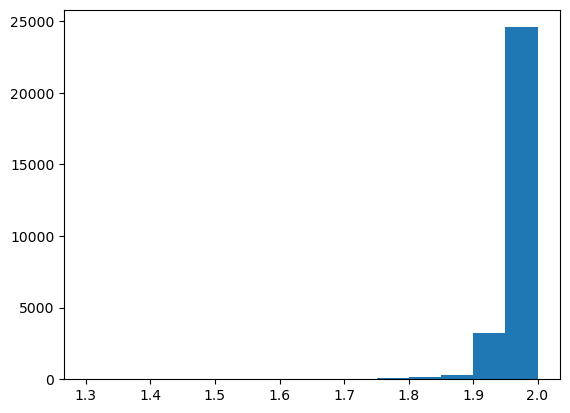

In [16]:
plt.hist(df['review_scores_rating'].apply(np.log10), bins=14)

In [17]:
# df['review_scores_rating'] = df['review_scores_rating'].apply(np.log10)

(array([21084.,  4754.,  2381.,   167.,    67.]),
 array([0. , 1.4, 2.8, 4.2, 5.6, 7. ]),
 <BarContainer object of 5 artists>)

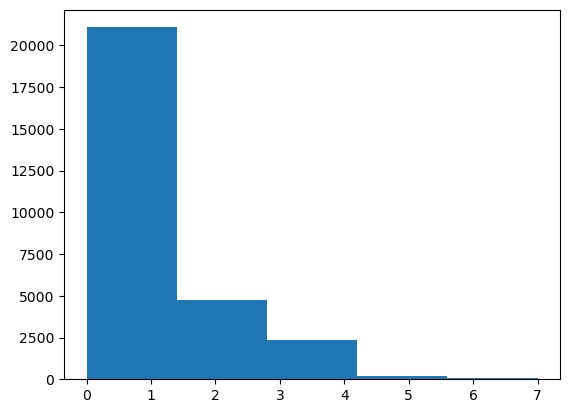

In [18]:
plt.hist(df['bedrooms'], bins=5)

(array([ 2680., 18404.,  4754.,  2381.,   234.]),
 array([0.        , 0.52915026, 1.05830052, 1.58745079, 2.11660105,
        2.64575131]),
 <BarContainer object of 5 artists>)

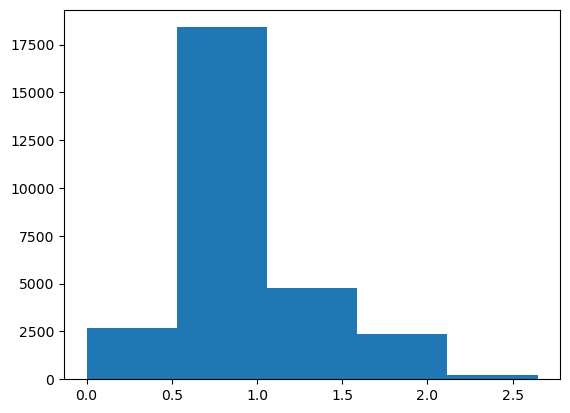

In [19]:
plt.hist(df['bedrooms'].apply(np.sqrt), bins=5)

In [20]:
df['bedrooms']=df['bedrooms'].apply(np.sqrt)

(array([2.3801e+04, 4.0490e+03, 5.7400e+02, 2.4000e+01, 5.0000e+00]),
 array([0. , 1.6, 3.2, 4.8, 6.4, 8. ]),
 <BarContainer object of 5 artists>)

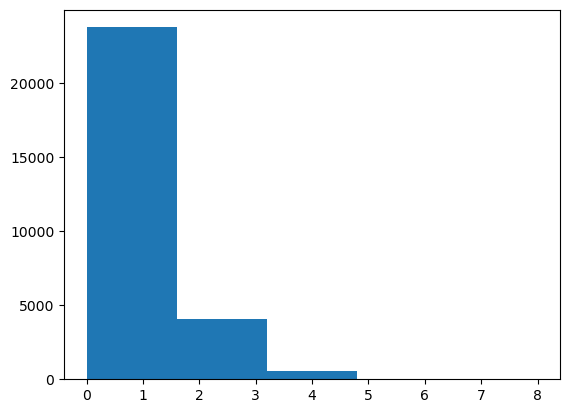

In [21]:
plt.hist(df['bathrooms'], bins=5)

(array([   38.,   226., 23537.,  4594.,    58.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

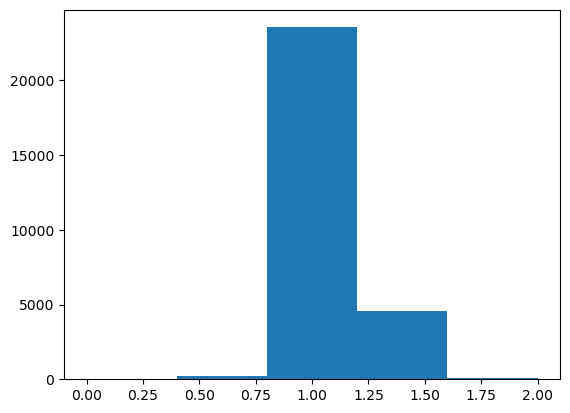

In [22]:
plt.hist(df['bathrooms'].apply(lambda x: pow(x,1/3)), bins=5)

In [23]:
df['bathrooms'] = df['bathrooms'].apply(lambda x: pow(x,1/3))

(array([16953.,  9794.,  1253.,   373.,    80.]),
 array([ 1.,  4.,  7., 10., 13., 16.]),
 <BarContainer object of 5 artists>)

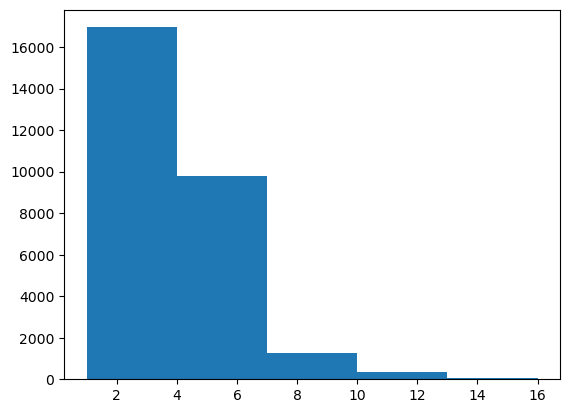

In [24]:
plt.hist(df['accommodates'], bins=5)

(array([ 1786., 15167.,  7163.,  3884.,   453.]),
 array([0.        , 0.240824  , 0.48164799, 0.72247199, 0.96329599,
        1.20411998]),
 <BarContainer object of 5 artists>)

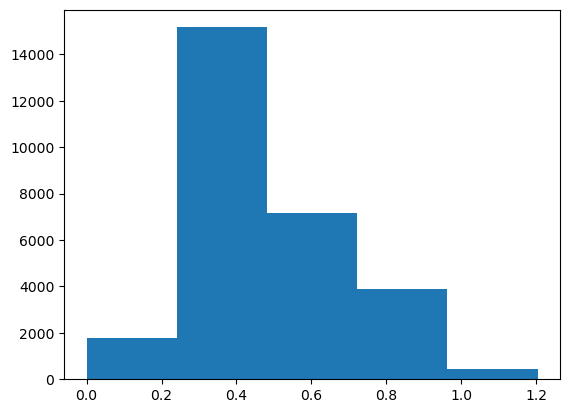

In [25]:
plt.hist(df['accommodates'].apply(np.log10), bins=5)

In [26]:
df['accommodates']=df['accommodates'].apply(np.log10)

(array([2.753e+04, 6.620e+02, 1.990e+02, 2.600e+01, 2.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.200e+01]),
 array([  1. ,  23.4,  45.8,  68.2,  90.6, 113. , 135.4, 157.8, 180.2,
        202.6, 225. ]),
 <BarContainer object of 10 artists>)

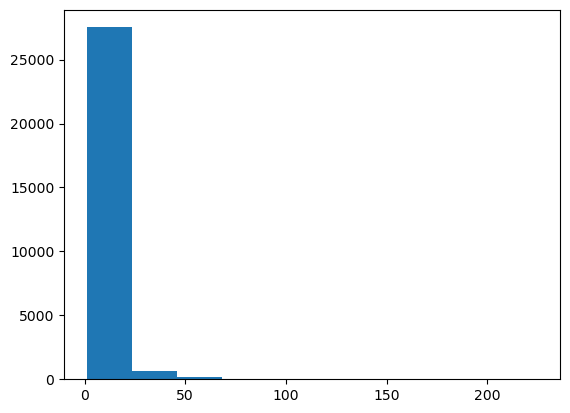

In [27]:
plt.hist(df.beds.apply(lambda x: pow(x,2)), bins =10)

In [28]:
# df.beds = df.beds.apply(lambda x: pow(x,2))

In [29]:
enc = OneHotEncoder(sparse=False)
encode_df = pd.DataFrame(enc.fit_transform(df[['city','zipcode','month']]))
encode_df.columns = enc.get_feature_names(['city','zipcode','month'])

/Users/johnwhendricks/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
df = df.merge(encode_df, left_index=True, right_index=True)
df.drop(columns=['city','zipcode','month'], inplace=True)

In [31]:
df.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,review_scores_rating,price,"city_Ballard, Seattle",city_Phinney Ridge Seattle,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,47.636289,-122.371025,0.60206,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47.636289,-122.371025,0.60206,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47.636289,-122.371025,0.60206,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47.636289,-122.371025,0.60206,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47.636289,-122.371025,0.60206,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X = df.drop(columns=['price'])
y = df['price']

In [33]:
print(X.shape)
print(y.shape)

(28453, 53)
(28453,)


In [34]:
X.columns

Index(['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'review_scores_rating', 'city_Ballard, Seattle',
       'city_Phinney Ridge Seattle', 'city_Seattle', 'city_Seattle ',
       'city_West Seattle', 'city_西雅图', 'zipcode_98101', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98104', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', 'zipcode_98121', 'zipcode_98122', 'zipcode_98125',
       'zipcode_98126', 'zipcode_98133', 'zipcode_98134', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98199', 'zipcode_99\n98122', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12'],
      dtype='object')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [62]:
X_train_scaled.shape

(21339, 53)

In [66]:
type(X_train_scaled)

numpy.ndarray

In [67]:
X_train_scaled.shape

(21339, 53)

In [37]:
X_train_scaled

array([[-2.3583559 ,  0.53755629,  0.58999459, ..., -0.29157419,
         3.40213805, -0.29926299],
       [ 0.95696729,  0.90095379,  0.58999459, ..., -0.29157419,
        -0.29393281,  3.34154253],
       [-1.70352911,  2.14971067, -0.70124302, ...,  3.42965885,
        -0.29393281, -0.29926299],
       ...,
       [-1.23427706,  0.80263169, -0.70124302, ..., -0.29157419,
        -0.29393281, -0.29926299],
       [ 1.9759281 , -0.67255454,  0.58999459, ..., -0.29157419,
        -0.29393281,  3.34154253],
       [ 0.79781195, -0.23564265, -0.70124302, ..., -0.29157419,
        -0.29393281, -0.29926299]])

In [38]:
y_train

25933    115.666667
18728    108.064516
17589     65.000000
23503    135.000000
15456    270.000000
            ...    
23622    120.000000
11988    103.681818
15763    107.645161
24308    170.000000
3285      57.000000
Name: price, Length: 21339, dtype: float64

In [39]:
input_dim = X.shape[1]

model = Sequential([
    Dense(200, input_dim = input_dim, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               10800     
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 25)                1275      
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
Total params: 37,251
Trainable params: 37,251
Non-trainable params: 0
_________________________________________________________________


2022-10-13 08:41:13.883191: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


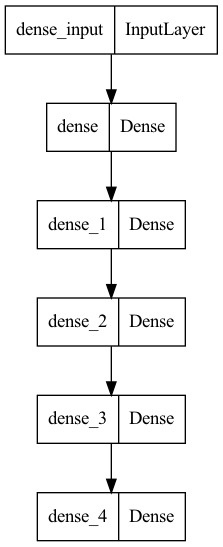

In [42]:
tf.keras.utils.plot_model(model)

In [43]:
model.compile(optimizer='adam',loss='mse')

In [44]:
history = model.fit(X_train_scaled, y_train, epochs=500, 
                    validation_data=(X_test_scaled, y_test))

Epoch 1/500
667/667 [==============================] - 2s 2ms/step - loss: 5896.2627 - val_loss: 3882.8113
Epoch 2/500
667/667 [==============================] - 1s 2ms/step - loss: 3970.0249 - val_loss: 3593.7864
Epoch 3/500
667/667 [==============================] - 1s 2ms/step - loss: 3852.8584 - val_loss: 3515.7178
Epoch 4/500
667/667 [==============================] - 1s 2ms/step - loss: 3719.9670 - val_loss: 3504.0425
Epoch 5/500
667/667 [==============================] - 1s 2ms/step - loss: 3633.6528 - val_loss: 3296.6025
Epoch 6/500
667/667 [==============================] - 1s 2ms/step - loss: 3566.0002 - val_loss: 3516.8235
Epoch 7/500
667/667 [==============================] - 1s 2ms/step - loss: 3417.5278 - val_loss: 3233.2915
Epoch 8/500
667/667 [==============================] - 1s 2ms/step - loss: 3340.7017 - val_loss: 3098.1111
Epoch 9/500
667/667 [==============================] - 1s 2ms/step - loss: 3253.7424 - val_loss: 3065.6125
Epoch 10/500
667/667 [===============

667/667 [==============================] - 1s 2ms/step - loss: 719.7828 - val_loss: 1229.1725
Epoch 78/500
667/667 [==============================] - 1s 2ms/step - loss: 763.0604 - val_loss: 1166.0312
Epoch 79/500
667/667 [==============================] - 1s 2ms/step - loss: 701.3381 - val_loss: 1135.2424
Epoch 80/500
667/667 [==============================] - 1s 1ms/step - loss: 678.7078 - val_loss: 1126.2963
Epoch 81/500
667/667 [==============================] - 1s 1ms/step - loss: 673.9379 - val_loss: 1114.6013
Epoch 82/500
667/667 [==============================] - 1s 1ms/step - loss: 700.9522 - val_loss: 1135.4440
Epoch 83/500
667/667 [==============================] - 1s 1ms/step - loss: 671.3284 - val_loss: 1071.3623
Epoch 84/500
667/667 [==============================] - 1s 1ms/step - loss: 660.0177 - val_loss: 1161.8560
Epoch 85/500
667/667 [==============================] - 1s 1ms/step - loss: 692.2299 - val_loss: 1258.2693
Epoch 86/500
667/667 [============================

667/667 [==============================] - 1s 1ms/step - loss: 397.3374 - val_loss: 870.0437
Epoch 154/500
667/667 [==============================] - 1s 1ms/step - loss: 399.8956 - val_loss: 961.7490
Epoch 155/500
667/667 [==============================] - 1s 2ms/step - loss: 374.8792 - val_loss: 814.2275
Epoch 156/500
667/667 [==============================] - 1s 1ms/step - loss: 349.3093 - val_loss: 829.7031
Epoch 157/500
667/667 [==============================] - 1s 1ms/step - loss: 401.5085 - val_loss: 877.8525
Epoch 158/500
667/667 [==============================] - 1s 1ms/step - loss: 349.4843 - val_loss: 811.8611
Epoch 159/500
667/667 [==============================] - 1s 1ms/step - loss: 345.2425 - val_loss: 794.7334
Epoch 160/500
667/667 [==============================] - 1s 1ms/step - loss: 376.3264 - val_loss: 868.5801
Epoch 161/500
667/667 [==============================] - 1s 1ms/step - loss: 351.1476 - val_loss: 817.4708
Epoch 162/500
667/667 [============================

667/667 [==============================] - 1s 1ms/step - loss: 250.7830 - val_loss: 668.1740
Epoch 230/500
667/667 [==============================] - 1s 1ms/step - loss: 253.1474 - val_loss: 724.9991
Epoch 231/500
667/667 [==============================] - 1s 1ms/step - loss: 241.7804 - val_loss: 730.5789
Epoch 232/500
667/667 [==============================] - 1s 1ms/step - loss: 253.2213 - val_loss: 686.5029
Epoch 233/500
667/667 [==============================] - 1s 1ms/step - loss: 233.1422 - val_loss: 688.8922
Epoch 234/500
667/667 [==============================] - 1s 1ms/step - loss: 226.8362 - val_loss: 711.8734
Epoch 235/500
667/667 [==============================] - 1s 1ms/step - loss: 240.8826 - val_loss: 735.0838
Epoch 236/500
667/667 [==============================] - 1s 1ms/step - loss: 257.1899 - val_loss: 680.9113
Epoch 237/500
667/667 [==============================] - 1s 1ms/step - loss: 233.6688 - val_loss: 724.0385
Epoch 238/500
667/667 [============================

667/667 [==============================] - 1s 1ms/step - loss: 173.2224 - val_loss: 632.1554
Epoch 306/500
667/667 [==============================] - 1s 1ms/step - loss: 169.2328 - val_loss: 763.8021
Epoch 307/500
667/667 [==============================] - 1s 1ms/step - loss: 215.8831 - val_loss: 647.5288
Epoch 308/500
667/667 [==============================] - 1s 1ms/step - loss: 173.5033 - val_loss: 644.2367
Epoch 309/500
667/667 [==============================] - 1s 1ms/step - loss: 205.2355 - val_loss: 629.0764
Epoch 310/500
667/667 [==============================] - 1s 1ms/step - loss: 182.9048 - val_loss: 677.9762
Epoch 311/500
667/667 [==============================] - 1s 1ms/step - loss: 180.1124 - val_loss: 675.5462
Epoch 312/500
667/667 [==============================] - 1s 1ms/step - loss: 178.1532 - val_loss: 632.5722
Epoch 313/500
667/667 [==============================] - 1s 1ms/step - loss: 183.8129 - val_loss: 690.5009
Epoch 314/500
667/667 [============================

667/667 [==============================] - 1s 1ms/step - loss: 143.3497 - val_loss: 598.5147
Epoch 382/500
667/667 [==============================] - 1s 1ms/step - loss: 143.2115 - val_loss: 594.6736
Epoch 383/500
667/667 [==============================] - 1s 1ms/step - loss: 156.3539 - val_loss: 633.1896
Epoch 384/500
667/667 [==============================] - 1s 1ms/step - loss: 176.0461 - val_loss: 599.3194
Epoch 385/500
667/667 [==============================] - 1s 1ms/step - loss: 137.8571 - val_loss: 581.4510
Epoch 386/500
667/667 [==============================] - 1s 1ms/step - loss: 135.0181 - val_loss: 575.0893
Epoch 387/500
667/667 [==============================] - 1s 1ms/step - loss: 140.7240 - val_loss: 600.3029
Epoch 388/500
667/667 [==============================] - 1s 1ms/step - loss: 151.5038 - val_loss: 641.0277
Epoch 389/500
667/667 [==============================] - 1s 1ms/step - loss: 139.8153 - val_loss: 588.0646
Epoch 390/500
667/667 [============================

667/667 [==============================] - 1s 1ms/step - loss: 115.9514 - val_loss: 597.4849
Epoch 458/500
667/667 [==============================] - 1s 1ms/step - loss: 124.0715 - val_loss: 565.8784
Epoch 459/500
667/667 [==============================] - 1s 1ms/step - loss: 124.2940 - val_loss: 587.3710
Epoch 460/500
667/667 [==============================] - 1s 1ms/step - loss: 118.6120 - val_loss: 583.0925
Epoch 461/500
667/667 [==============================] - 1s 1ms/step - loss: 120.6412 - val_loss: 558.5717
Epoch 462/500
667/667 [==============================] - 1s 1ms/step - loss: 121.1435 - val_loss: 557.2654
Epoch 463/500
667/667 [==============================] - 1s 1ms/step - loss: 129.3097 - val_loss: 569.8989
Epoch 464/500
667/667 [==============================] - 1s 1ms/step - loss: 122.7497 - val_loss: 699.9290
Epoch 465/500
667/667 [==============================] - 1s 1ms/step - loss: 138.1962 - val_loss: 551.0904
Epoch 466/500
667/667 [============================

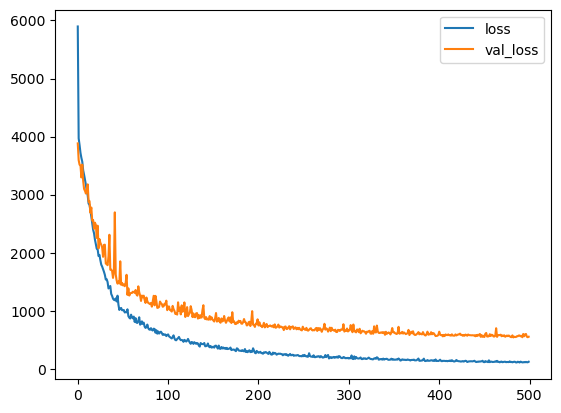

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.show()

In [46]:
model.save('model.hdf5')
y_pred = model.predict(X_test_scaled)

223/223 [==============================] - 0s 795us/step


Text(0.5, 0, 'predicted price')

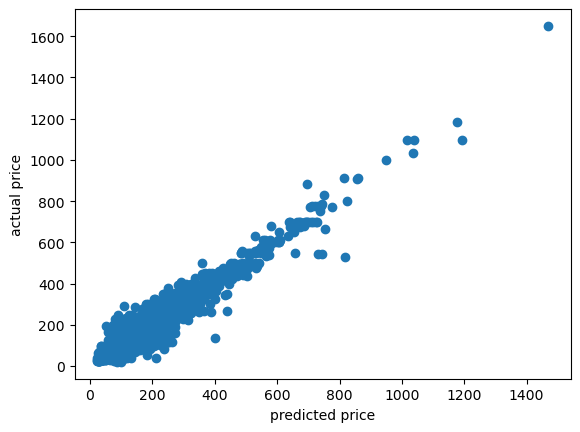

In [47]:
plt.scatter(y_pred, y_test)
plt.ylabel('actual price')
plt.xlabel('predicted price')

In [48]:
y_pred.tolist()

[[268.42767333984375],
 [70.15653991699219],
 [89.61022186279297],
 [232.17124938964844],
 [75.55003356933594],
 [179.86953735351562],
 [93.45436096191406],
 [235.52865600585938],
 [199.2770233154297],
 [197.8513641357422],
 [204.97085571289062],
 [104.52986145019531],
 [108.01911926269531],
 [139.28253173828125],
 [68.35880279541016],
 [76.70381927490234],
 [101.41281127929688],
 [53.16829299926758],
 [95.94225311279297],
 [240.17724609375],
 [57.73292541503906],
 [112.19498443603516],
 [1469.1124267578125],
 [84.48165893554688],
 [209.25865173339844],
 [71.23497772216797],
 [151.05677795410156],
 [161.0792236328125],
 [191.5955352783203],
 [200.58876037597656],
 [62.934898376464844],
 [115.57959747314453],
 [62.78495407104492],
 [59.20222473144531],
 [108.1235580444336],
 [126.36161041259766],
 [149.6772003173828],
 [65.37504577636719],
 [181.09783935546875],
 [94.53083038330078],
 [135.2853546142578],
 [81.93203735351562],
 [113.31919860839844],
 [196.4071502685547],
 [237.979995727

In [49]:
y_test.values.tolist()

[300.0,
 65.0,
 95.0,
 233.19354838709677,
 74.16129032258064,
 150.0,
 75.0,
 250.0,
 223.8709677419355,
 200.0,
 209.1,
 95.0,
 98.0,
 98.0,
 65.0,
 89.0,
 100.0,
 50.0,
 100.0,
 280.0,
 43.0,
 110.0,
 1650.0,
 85.0,
 225.0,
 135.16129032258064,
 135.33333333333334,
 129.86666666666667,
 180.0,
 105.0,
 59.4,
 95.0,
 59.93103448275862,
 55.0,
 141.0,
 144.06666666666666,
 175.0,
 52.0,
 184.16129032258064,
 46.3,
 157.0,
 95.0,
 119.0,
 224.09677419354838,
 256.61290322580646,
 143.33333333333334,
 75.0,
 121.76470588235294,
 55.0,
 225.0,
 182.74193548387098,
 332.5,
 115.0,
 115.33333333333333,
 462.53333333333336,
 160.0,
 119.0,
 125.0,
 91.42857142857143,
 700.0,
 150.0,
 120.5,
 125.26666666666667,
 145.6451612903226,
 75.0,
 115.0,
 125.0,
 37.0,
 95.0,
 153.9,
 77.75862068965517,
 110.0,
 311.6666666666667,
 85.0,
 99.0,
 477.2258064516129,
 87.0,
 151.0,
 49.0,
 110.0,
 95.65,
 90.0,
 136.3793103448276,
 105.0,
 125.16129032258064,
 125.2258064516129,
 120.0,
 54.0,
 66.6,
 

In [50]:
results_df = pd.DataFrame({'predicted price':y_pred[:,0]})
results_df.head()

,predicted price
0,268.427673
1,70.156540
2,89.610222
3,232.171249
4,75.550034


In [51]:
results_df['actual price'] = y_test.values

In [52]:
results_df.head(20)

,predicted price,actual price
0,268.427673,300.000000
1,70.156540,65.000000
2,89.610222,95.000000
3,232.171249,233.193548
4,75.550034,74.161290
5,179.869537,150.000000
6,93.454361,75.000000
7,235.528656,250.000000
8,199.277023,223.870968
9,197.851364,200.000000


In [53]:
results_df['diff'] = abs(results_df['predicted price'] - results_df['actual price'])
results_df

,predicted price,actual price,diff
0,268.427673,300.000000,31.572327
1,70.156540,65.000000,5.156540
2,89.610222,95.000000,5.389778
3,232.171249,233.193548,1.022299
4,75.550034,74.161290,1.388743
...,...,...,...
7109,101.895584,109.000000,7.104416
7110,46.529770,43.935484,2.594286
7111,141.874893,145.000000,3.125107
7112,52.873077,46.400000,6.473077


In [54]:
rmse = np.sqrt(history.history['val_loss'][-1])
diffs = results_df['diff'].sum() / results_df.shape[0]
results_df['lower'] = round(results_df['predicted price'] - 2*rmse)
results_df['upper'] = round(results_df['predicted price'] + 2*rmse)

results_df.loc[results_df['lower'] < 20, 'lower'] = 20

results_df['accurate'] = (results_df['lower'] <= results_df['actual price']) & (results_df['actual price'] <= results_df['upper']) 
results_df.tail()

,predicted price,actual price,diff,lower,upper,accurate
7109,101.895584,109.000000,7.104416,55.0,149.0,True
7110,46.529770,43.935484,2.594286,20.0,94.0,True
7111,141.874893,145.000000,3.125107,95.0,189.0,True
7112,52.873077,46.400000,6.473077,20.0,100.0,True
7113,126.293259,118.633333,7.659925,79.0,173.0,True


In [55]:
results_df.head(20)

,predicted price,actual price,diff,lower,upper,accurate
0,268.427673,300.000000,31.572327,221.0,315.0,True
1,70.156540,65.000000,5.156540,23.0,117.0,True
2,89.610222,95.000000,5.389778,43.0,137.0,True
3,232.171249,233.193548,1.022299,185.0,279.0,True
4,75.550034,74.161290,1.388743,28.0,123.0,True
5,179.869537,150.000000,29.869537,133.0,227.0,True
6,93.454361,75.000000,18.454361,46.0,141.0,True
7,235.528656,250.000000,14.471344,188.0,283.0,True
8,199.277023,223.870968,24.593944,152.0,246.0,True
9,197.851364,200.000000,2.148636,151.0,245.0,True


In [56]:
results_df[results_df['accurate'] == False]

,predicted price,actual price,diff,lower,upper,accurate
22,1469.112427,1650.000000,180.887573,1422.0,1516.0,False
25,71.234978,135.161290,63.926313,24.0,118.0,False
29,200.588760,105.000000,95.588760,154.0,248.0,False
39,94.530830,46.300000,48.230830,47.0,142.0,False
51,275.259399,332.500000,57.240601,228.0,322.0,False
...,...,...,...,...,...,...
6998,212.886810,149.580645,63.306165,166.0,260.0,False
7047,125.857330,175.346154,49.488824,79.0,173.0,False
7053,189.730911,114.000000,75.730911,143.0,237.0,False
7055,151.607758,232.000000,80.392242,105.0,199.0,False


In [57]:
results_df['accurate'].value_counts()

True     6738
False     376
Name: accurate, dtype: int64

In [58]:
results_df['accurate'].value_counts()[1] / results_df['accurate'].value_counts().sum()

0.9471464717458532

In [59]:
_, _, r_value, _, _ = linregress(results_df['predicted price'].values,results_df['actual price'].values)

In [60]:
print('r value:',r_value)

r value: 0.9742228248310335


In [61]:
import pickle
filename='model.pkl'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://122bdd31-1112-472b-a198-21cf9ea56ff0/assets
